# Credit Card Default : Random Forest Classifier Model

# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("D:/Credit Card Default iNeuron Internship/Dataset/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df1 = df.drop(labels=['ID'],axis=1)

In [4]:
df1['SEX']=df['SEX'].astype(str)
df1['EDUCATION']=df['EDUCATION'].astype(str)
df1['MARRIAGE']=df['MARRIAGE'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# Defining X and Y

In [5]:
X = df1.drop(labels=['default.payment.next.month'],axis=1)
Y = df1[['default.payment.next.month']]

In [6]:
from definitions import catcon
cat, con = catcon(X)

Categorical and Continuous variables appended


In [7]:
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
Xnew.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,1,0,0,0,0,0,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,0,1,0,0,0,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,0,0,1,0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,0,0,1,0,0


# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Random Forest Base Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21,n_estimators=40)
model = rfc.fit(xtrain,ytrain)

In [10]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.998
Testing Accuracy  :  0.8128
Training Recall   :  0.9919
Testing Recall    :  0.3551


<AxesSubplot: >

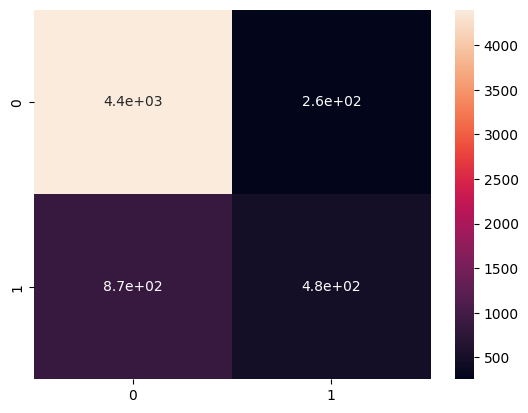

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True)

# Model 2.1 Random Forest Gridsearch cv with Max Depth Pruning

In [15]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(31,61,1),"max_depth":range(2,20),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4,verbose=1)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits


{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 58}

In [13]:
rfc = RandomForestClassifier(random_state=21,n_estimators=30,max_depth=10,criterion='entropy')
model21 = rfc.fit(xtrain,ytrain)

In [14]:
tr_pred = model21.predict(xtrain)
ts_pred = model21.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc21 = accuracy_score(ytrain,tr_pred)
ts_acc21 = accuracy_score(ytest,ts_pred)
tr_rec21 = recall_score(ytrain,tr_pred)
ts_rec21 = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc21,4))
print('Testing Accuracy  : ',round(ts_acc21,4))
print('Training Recall   : ',round(tr_rec21,4))
print('Testing Recall    : ',round(ts_rec21,4))

Training Accuracy :  0.8518
Testing Accuracy  :  0.8215
Training Recall   :  0.4293
Testing Recall    :  0.3566


In [19]:
rfc = RandomForestClassifier(random_state=21,n_estimators=58,max_depth=9,criterion='entropy')
model21 = rfc.fit(xtrain,ytrain)
tr_pred = model21.predict(xtrain)
ts_pred = model21.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc21 = accuracy_score(ytrain,tr_pred)
ts_acc21 = accuracy_score(ytest,ts_pred)
tr_rec21 = recall_score(ytrain,tr_pred)
ts_rec21 = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc21,4))
print('Testing Accuracy  : ',round(ts_acc21,4))
print('Training Recall   : ',round(tr_rec21,4))
print('Testing Recall    : ',round(ts_rec21,4))

Training Accuracy :  0.8412
Testing Accuracy  :  0.8195
Training Recall   :  0.3977
Testing Recall    :  0.3447


<AxesSubplot: >

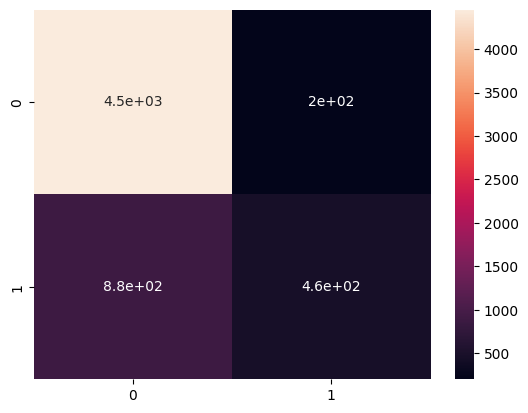

In [20]:
from sklearn.metrics import confusion_matrix
cf2 = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf2,annot=True)

In [22]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model21.feature_importances_

In [23]:
Q = Q.sort_values(by=["imp"],ascending=False)
Q.index = Q['col']
Q = Q.drop(labels=['col'],axis=1)

In [24]:
Q

,imp
col,
PAY_0,0.237598
PAY_2,0.116170
PAY_3,0.090007
PAY_4,0.059907
PAY_5,0.048724
PAY_AMT1,0.042194
LIMIT_BAL,0.039495
BILL_AMT1,0.035845
PAY_AMT3,0.032161


<AxesSubplot: xlabel='col'>

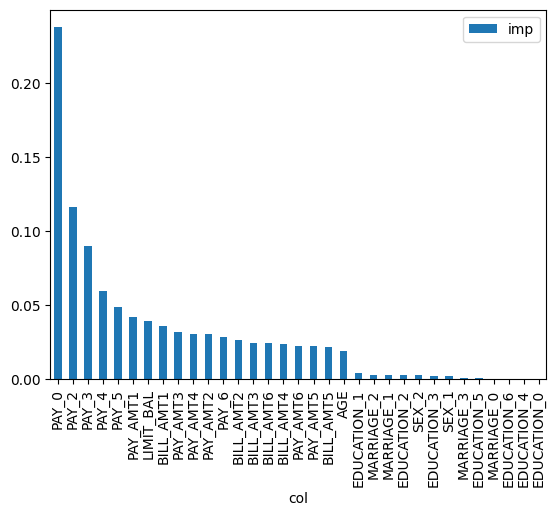

In [25]:
Q.plot(kind='bar')

# Saving Model.pkl file

In [28]:
import pickle
with open('./Models/rfcmodel.pkl', 'wb') as files:
    pickle.dump(model21, files)